**This is the second part of the module 6 assignment. The full module 6 assignment will be due on Friday, April 22 at 11:59 pm ET.  To submit your work, please download this document as an html file and upload that to Canvas.** 

In this assignment, you'll continue to explore the behavior of systems with stochasticity that exhibit phase transitions.

In stochastic systems, the outcome of every simulation is different (due to the presence of random fluctuations). However, we expect that the system will reach equilibrium and therefore become *ergodic*, i.e., all accessible configurations are equiprobable over a long period of time. It follows from this that we can either run a single simulation for a very long time, or equivalently, we can average the behavior of multiple simulations with the same parameters. The latter is often less time consuming, so it can be beneficial to run multiple instantiations and average the results together. 

There are several hallmarks of a phase transition, like that seen in the Ising model. Depending on the nature of the phase transition (e.g., first order, second order), there are physical quantities in the system that can become undefined at the transition. One such quantity for the *Ising model* and for *percolation* (which you'll explore in the second question) is related to the sizes and variation of sizes of the clusters of spins.



1. *Ising model:* You explored averaging multiple simulations together last week, however, the results may have been messy due to system size effects. Given the limitations of your time as well as the connection time to Google colab, the maximum system size you can simulate is somewhat small. The phase transition in the Ising model does have a system size dependence, and the transition becomes much clearer and sharper for larger system sizes. 

In this question, you'll explore the cluster sizes of simulation results from a bigger system (actual simulation [here](https://mattbierbaum.github.io/ising.js/), in case you want to explore more on your own).

(a) Write a function that takes in a binary image and computes and returns the following quantities about connected components within the image: area of each cluster, number of clusters, average cluster area, the variance of the cluster areas, and the maximum cluster area (don't forget about periodic boundary conditions for these measurements). Your function should also return the labeled image so that you can display it. Note: characterize cluster areas from of the dominant pixel value in the image (e.g., if there are more light pixels, characterize light clusters).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
import skimage.measure

In [2]:
def get_attrs(binary: image):
  background = 1 if np.mean(binary) < 0.5 else 0 # background is 1 if we have more 0, else 0
  label_image = skimage.measure.label(binary, background = background)
  props = skimage.measure.regionprops(label_image)

  areas = [prop.area for prop in props]
  size = len(props)
  avg_area = np.mean(areas)
  cluster_var = np.var(areas)
  max_cluster_area = np.max(areas)

  return label_image, areas, size, avg_area, cluster_var, max_cluster_area

> One way we can resolve the periodic boundaries is by observing the bounding box and then checking boundary neighbors and verifying that they are the same binary value. 

(b) Download results [here](https://www.dropbox.com/sh/4kuhkypxemc5o0e/AAAt2KXfeTVtHdfAWU9bLUG5a?dl=0) from a larger simulation. Copy these images into your working directory and import them into your notebook. Note that, though these images have four color channels, the first three should identical because there are only white and black pixels in the image (the fourth is blank), so you can keep any one of the first three channels as your binary image. Run your code from part (a) for each image, and make an array of subplots that displays the label image for each temperature (which can be found in the image name). Be sure to include a title for each plot.

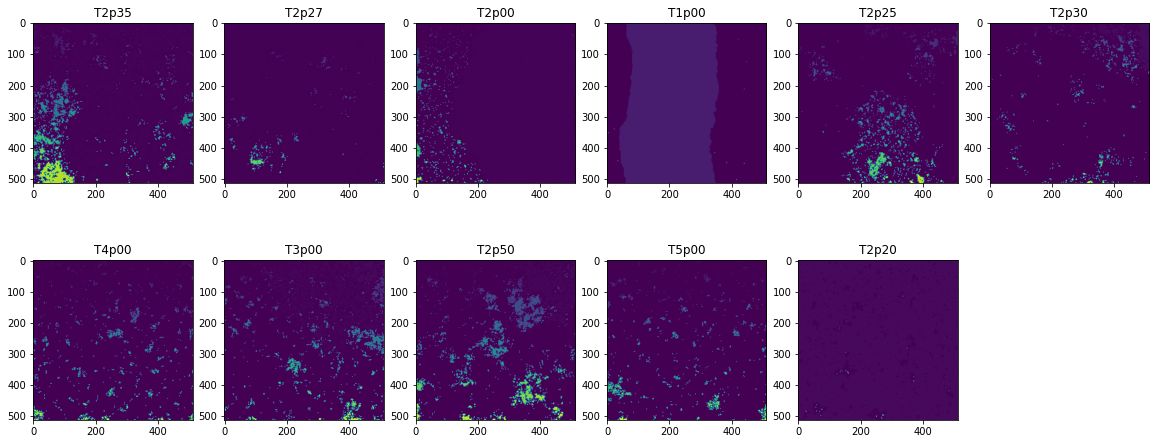

In [3]:
import os

imgs = list(os.walk("imgs/"))[0][2]
frames = [image.imread("imgs/" + img) for img in imgs]
attrs = []

fig = plt.figure(figsize=(20,8))

for i, frame in enumerate(frames):
  attrs.append(get_attrs(frame[:, :, 0]))

  label_image, areas, size, avg_area, cluster_var, max_cluster_area = attrs[i]
  ax = plt.subplot(2, 6, i + 1)
  ax.imshow(label_image)
  ax.set(title=imgs[i][12:-4])

plt.show()

(c) Make a temperature array and plot for each of the following quantities as a function of temperature: number of clusters, average area, variance of areas, and maximum area. Normalize areas by overall system area, so that the values are between zero and one.  Discuss the temperature dependence of each plot and how it compares to your expectations.  

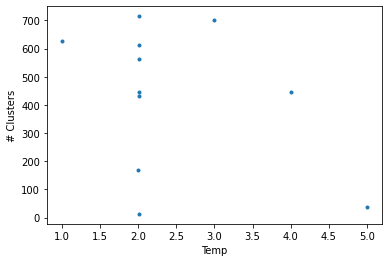

In [4]:
fig, ax = plt.subplots(1, 1)
temp = [1, 2.001, 2.002, 2.003, 2.004, 2.005, 2.006, 2.007, 3, 4 ,5]

ax.plot(temp, [attr[2] for attr in attrs], ".")

ax.set(xlabel = "Temp", ylabel = "# Clusters")
plt.show()

> The distribution of number of clusters as a function of temperature appears to follow a right skewed distribution. As temperature increases, the number of clusters peaks at T=2 and then decreases as T continues to increase.

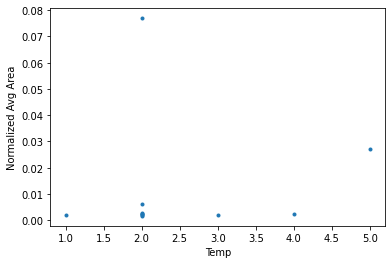

In [5]:
fig, ax = plt.subplots(1, 1)
temp = [1, 2.001, 2.002, 2.003, 2.004, 2.005, 2.006, 2.007, 3, 4 ,5]
na = [attr[3]/attr[5] for attr in attrs]
ax.plot(temp, na, ".")

ax.set(xlabel = "Temp", ylabel = "Normalized Avg Area")
plt.show()

> The normalized area average does not appear to have clear correlation with temperature. On average, the normalized area average values are below 0.01 with two outliers. The highest normalized average area was approximately 0.08.

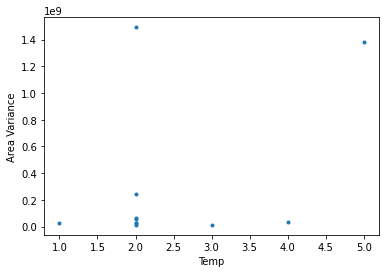

In [6]:
fig, ax = plt.subplots(1, 1)
temp = [1, 2.001, 2.002, 2.003, 2.004, 2.005, 2.006, 2.007, 3, 4 ,5]

ax.plot(temp, [attr[4] for attr in attrs], ".")

ax.set(xlabel = "Temp", ylabel = "Area Variance")
plt.show()

> The distribution of area variance as a function of temperature doesn't appear to have a clear correlation with temperature. As temperature increases, the number of clusters peaks at T=2 and then decreases as T continues to increase to T = 3. Finally, Area variance appears to increase again as T increases to T = 5.

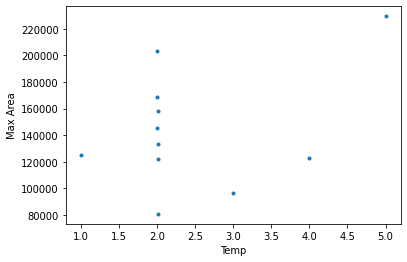

In [7]:
fig, ax = plt.subplots(1, 1)
temp = [1, 2.001, 2.002, 2.003, 2.004, 2.005, 2.006, 2.007, 3, 4 ,5]

ax.plot(temp, [attr[5] for attr in attrs], ".", label = "Max Area")

ax.set(xlabel = "Temp", ylabel = "Max Area")
plt.show()


> The distribution of max area as a function of temperature appears to follow what might look like a binomial distribution. As temperature increases, the number of clusters peaks at T=2 and then suddenly drop. Then they continue to increase as T continues to increase.

2. *Node percolation*: Another relatively simple system that exhibits diverse behavior is percolation. In this system, each node is assumed to be "open" with probability p and "closed" with probability 1-p, and liquid can flow through open parts of the system. This model was inspired by geophysical flows (e.g., oil) through porous substrates, and developed to address the question: at what point can the liquid flow from one end of the system to the other?

(a) Given the description above, what is required for the liquid to flow from one side of the system to the other? How might we measure / quantify this?  

We would need there to be an "open" node cluster which spans the two sides of the systems. We can measure this by observing the bounding boxes of clusters and detecting any clusters which travel from one end of the system to the other (W or H = System Size N). 

(b) Write a function that creates an NxN matrix of random numbers between zero and 1, and binarizes this matrix by setting values smaller than a specified input threshold equal to 1 (these are open nodes) and everything else equal to zero (these are closed nodes). Your function should have inputs of N and threshold, and should output an NxN binary matrix. Note: this is simpler than the problem in class -- you are not being asked to compute/estimate a "best" threshold for the conversion to a binary image; instead, here, you'll vary this threshold value to explore how the system behaves.

In [8]:
def ran_bin(N, thresh):
  im = np.zeros([N, N])

  for x in range(N):
    for y in range(N):
      im[x, y] = 1 if np.random.rand() < thresh else 0

  return im

(c) Write a function that characterizes the open clusters in the binary image created by your function in part(b). Your function should return the label image,  number of clusters, the maximum cluster area, and the measures you proposed in part (a). Test your function on a small system (say N=100) for p=0.1 and p=0.9. Plot label images and discuss what you see. Discuss the results in the context of the qualitative picture for the model: what do these plots suggest about the flow of liquid through the system and why? 

In [9]:
def characterize(binary: image):
  label_image = skimage.measure.label(binary, background = 0) # closed are 0, characterize only open
  props = skimage.measure.regionprops(label_image)

  areas = [prop.area for prop in props]
  size = len(props)
  avg_area = np.mean(areas)
  cluster_var = np.var(areas)
  max_cluster_area = np.max(areas)
  bounding_boxes = [prop.bbox for prop in props]
  mbb = None
  mbbv = 0 
  for bb in bounding_boxes:
    w = abs(bb[3] - bb[0])
    h = abs(bb[2] - bb[1])
    if w*h > mbbv:
      mbb = bb
      mbbv = w*h

  return label_image, areas, size, avg_area, cluster_var, max_cluster_area, mbb

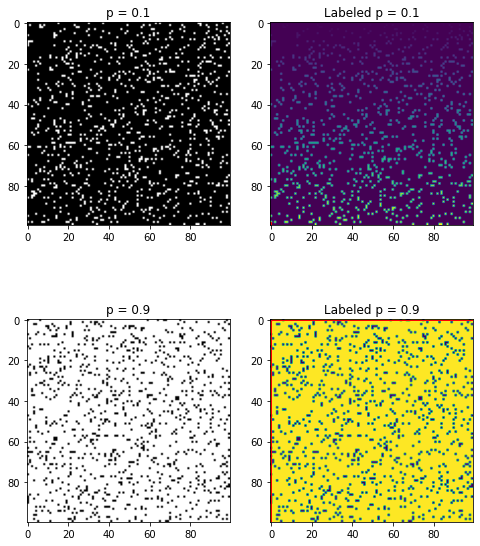

In [10]:
import matplotlib.patches as patches

def get_rect(bb):
  return patches.Rectangle((bb[1], bb[0]), bb[3] - bb[0], bb[2] - bb[1],
                           fill = False, color="red")
  
def get_bb_wh(bb):
  return abs(bb[3] - bb[0]), abs(bb[2] - bb[1])

N = 100

im1 = ran_bin(N, 0.1)
im9 = ran_bin(N, 0.9)

fig = plt.figure(figsize=(8,10))

label_image1, areas, size, avg_area, cluster_var, max_cluster_area, bb = characterize(im1)

ax = plt.subplot(2, 2, 1)
ax.imshow(im1, cmap="gray")
ax.set(title = "p = 0.1")

ax = plt.subplot(2, 2, 2)
ax.imshow(label_image1)
ax.add_patch(get_rect(bb))
ax.set(title = "Labeled p = 0.1")

label_image9, areas, size, avg_area, cluster_var, max_cluster_area, bb = characterize(im9)

ax = plt.subplot(2, 2, 3)
ax.imshow(im9, cmap="gray")
ax.set(title = "p = 0.9")

ax = plt.subplot(2, 2, 4)
ax.imshow(label_image9)
ax.add_patch(get_rect(bb))
ax.set(title = "Labeled p = 0.9")

plt.show()

> In the p=0.1, we do not see clusters that span the size of the system. Therefore, we claim that it is unlikely that liquid will flow through the system. In p=0.9, we see that there is a cluster which spans the length of the system and therefore liquid is likely to flow through the system. This is verified by the fact that our bounding box is the size of the image (see red outline).

(d) To explore behavior of the model at intermediate values, create a finely and uniformly spaced array of probabilities, p (between 0 and 1, with 100 data points), and run your program above for each value of p and a system size of N = 1000. Plot the function outputs that describe cluster properties in the system as a function of p. Do large and small values behave the way you expect? Describe the behavior for intermediate p values and explain qualitatively what you think is happening.

In [11]:
ps = np.linspace(0, 1, 100)
valid_ps = []
N = 1000

attrs = []

for p in ps:
  try:
    im = ran_bin(N, p)
    attr = characterize(im)
    attrs.append(attr)
    valid_ps.append(p)
  except:
    print(f"Failed to characterize {p}")

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3724: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Failed to characterize 0.0


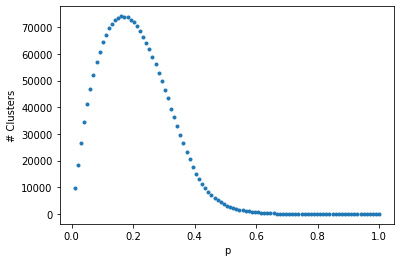

In [12]:
fig, ax = plt.subplots(1, 1)

ax.plot(valid_ps, [attr[2] for attr in attrs], ".")

ax.set(xlabel = "p", ylabel = "# Clusters")
plt.show()

> As p increases, we see an increase in open clusters because they are more likely to occur. But, as the probability of open nodes increases, we see less clusters since they're all grouped up and thus less clusters. This is reasonable.

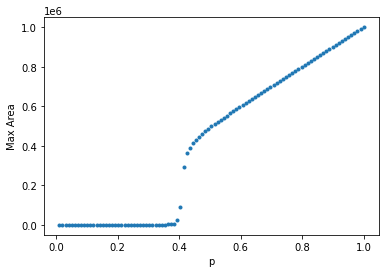

In [13]:
fig, ax = plt.subplots(1, 1)

ax.plot(valid_ps, [attr[5] for attr in attrs], ".")

ax.set(xlabel = "p", ylabel = "Max Area")
plt.show()

> Similarly, as p increases, we see the max area slowly rise until there are so many "combined" nodes that we have large clusters. This is reasonable however the sudden jump was suprising.

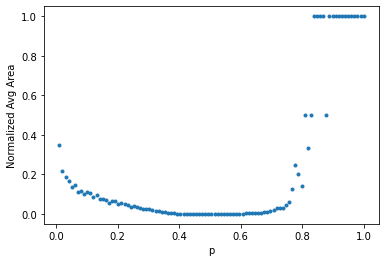

In [14]:
fig, ax = plt.subplots(1, 1)
# label_image9, areas, size, avg_area, cluster_var, max_cluster_area
ax.plot(valid_ps, [attr[3]/attr[5] for attr in attrs], ".")

ax.set(xlabel = "p", ylabel = "Normalized Avg Area")
plt.show()

> As the p value is small, we have less nodes that are scattered and therefore the average area is much closer to the system max. As p increases, nodes become scattered so our average area is now smaller and further from the system max. Finally, as p is large, we have large nodes and our average area is realtively closer to the max area.

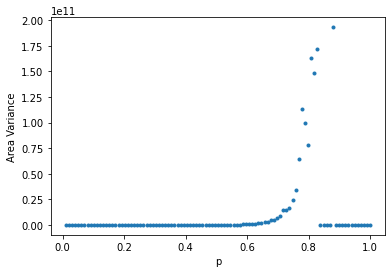

In [15]:
fig, ax = plt.subplots(1, 1)

ax.plot(valid_ps, [attr[4] for attr in attrs], ".")

ax.set(xlabel = "p", ylabel = "Area Variance")
plt.show()

> As p increases, our areas become larger. With some clusters being large and some small, we see high variance. However, when clusters are so large they are practically just the same cluster, we see no variance. This is also seems reasonable.

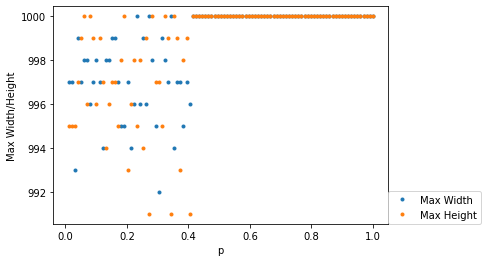

In [16]:
fig, ax = plt.subplots(1, 1)

wh = []
valid_ps2 = []
for i, attr in enumerate(attrs):
  if attr[6] is not None:
    wh.append(get_bb_wh(attr[6]))
    valid_ps2.append(valid_ps[i])

ax.plot(valid_ps2, [w[0] for w in wh], ".", label = f"Max Width")
ax.plot(valid_ps2, [h[1] for h in wh], ".", label = f"Max Height")


ax.set(xlabel = "p", ylabel = "Max Width/Height")
ax.legend(loc=(1, 0))
plt.show()

> Finally, we observe the max width & hight for each p value. As p increases, we see that the maximum bounding box width/height reaches our system size of N=1000 indicating that liquid is likely to flow across the system. This is what we expected

(e) Repeat the calculations for part (d), and vary the system size, N. Use values of N = [10, 20, 50, 100, 200, 500, 1000]. Plot the maximum cluster area (normalized by system area) as a function of p for all N values on the same axes. Be sure to include axis labels and plot labels for each curve. Describe the behavior of the system as a function of system size, and explain why this happens. 

In [17]:
Ns = [10, 20, 50, 100, 200, 500, 1000]

ps = np.linspace(0, 1, 100)

valid_ps = {}
attrs = {}

for N in Ns:

  attrs[N] = []
  valid_ps[N] = []

  print(f"Running System Size N={N}")

  for p in ps:
    try:
      im = ran_bin(N, p)
      attr = characterize(im)
      attrs[N].append(attr)
      valid_ps[N].append(p)
    except:
      print(f"[N = {N}] Failed to characterize {p}")

Running System Size N=10
[N = 10] Failed to characterize 0.0
[N = 10] Failed to characterize 0.020202020202020204
Running System Size N=20
[N = 20] Failed to characterize 0.0
Running System Size N=50


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3724: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[N = 50] Failed to characterize 0.0
Running System Size N=100
[N = 100] Failed to characterize 0.0
Running System Size N=200
[N = 200] Failed to characterize 0.0
Running System Size N=500
[N = 500] Failed to characterize 0.0
Running System Size N=1000
[N = 1000] Failed to characterize 0.0


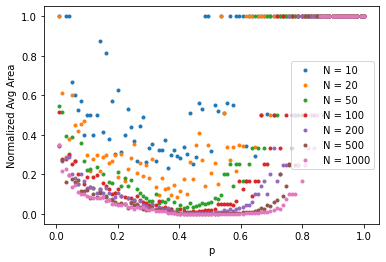

In [18]:
fig, ax = plt.subplots(1, 1)
for N in Ns:
  ax.plot(valid_ps[N], [attr[3]/attr[5] for attr in attrs[N]], ".", label = f"N = {N}")

ax.set(xlabel = "p", ylabel = "Normalized Avg Area")
ax.legend()
plt.show()

As N increases, normalized average area decreases. This is because open nodes are less likely to be next to each other to form larger clusters. We similar behavior in this plot. As the p value is small, we have less nodes that are scattered and therefore the average area is much closer to the system max. As p increases, nodes become scattered (noiser) so our average area is now smaller and further from the system max. Finally, as p is large, we have large clusters and our average area is realtively closer to the max area.